In [1]:
import pandas as pd
import geopandas
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import shapefile as shp
from paths import *
from refuelplot import *
setup()
sns.set_style("darkgrid")

In [2]:
results = pd.read_pickle(results_path + '/results_merged.pkl')

In [3]:
wpNZ = pd.read_csv(data_path + "/NZ/windparks_NZ.csv", delimiter=';')
wpBRA = pd.read_csv(data_path + '/BRA/turbine_data.csv',index_col=0)
wpUSA = pd.read_csv(data_path + '/USA/uswtdb_v2_3_20200109.csv')
# remove Guam
wpUSA = wpUSA[wpUSA.t_state!='GU']
wpZAF = pd.read_csv(data_path + '/ZAF/windparks_ZAF.csv')

In [4]:
shpBRA = geopandas.read_file(data_path + '/country_shapefiles/BRA/BRA_adm1.shp')
shpNZ = geopandas.read_file(data_path + '/country_shapefiles/NZ/CON2017_HD_Clipped.shp')
shpUSA = geopandas.read_file(data_path + '/country_shapefiles/USA/cb_2018_us_state_500k.shp')
shpZAF = geopandas.read_file(data_path + '/country_shapefiles/ZAF/zaf_admbnda_adm1_2016SADB_OCHA.shp')

# plot correlations at locations

## NZ

In [8]:
NZcor = results[(results.country=='NZ')&(results.param=='cor')&(results.ds2=='ERA5_GWA2')&(results.scale=='park')&(results.temp=='h')]

In [9]:
locNZ = pd.DataFrame({'lon':wpNZ.Longitude.values,
                     'lat':wpNZ.Latitude.values},
                     index=['te_apiti','te_rere_hau',np.nan,np.nan,'te_uku','twf_1','twf_2','twf_3','west_wind','white_hill'])
locNZ = locNZ.loc[locNZ.index.dropna()]

In [10]:
NZcor['lon'] = NZcor.region.map(locNZ.lon)
NZcor['lat'] = NZcor.region.map(locNZ.lat)

/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


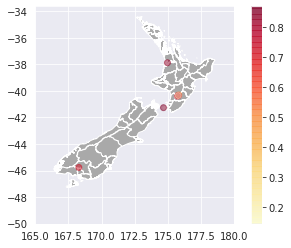

In [62]:
shpNZ.to_crs({'init': 'epsg:4326'}).plot(color='darkgrey').set_xlim(165,180)
#plt.plot(NZcor.lon,NZcor.lat,'o',markersize=4)
plt.scatter(x=NZcor.lon,y=NZcor.lat,c=NZcor.value,cmap='YlOrRd',alpha=0.5,label='cor')
plt.colorbar()

plot windparks: either all with opacity or aggregate to windparks and maybe use size as capacity indicator?

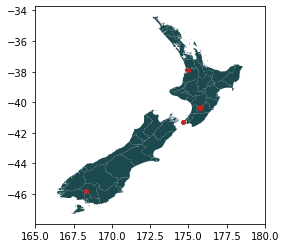

In [29]:
shpNZ.to_crs({'init': 'epsg:4326'}).plot(color=COLORS[4]).set_xlim(165,180)
plt.plot(wpNZ.Longitude,wpNZ.Latitude,'o',markersize=4)

## BRA

In [5]:
BRAcor = results[(results.country=='BRA')&(results.param=='cor')&(results.ds2=='ERA5_GWA2')&(results.scale=='park')&(results.temp=='h')]

In [6]:
locBRA = pd.concat([wpBRA.groupby('name').lon.first(),
           wpBRA.groupby('name').lat.first()],axis=1)

In [7]:
BRAcor['lon'] = BRAcor.region.map(locBRA.lon)
BRAcor['lat'] = BRAcor.region.map(locBRA.lat)

/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


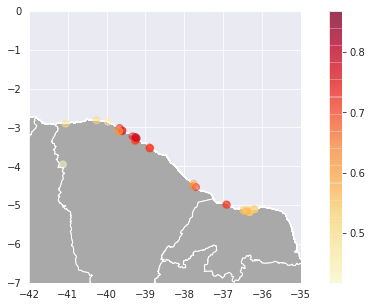

In [95]:
# northeast Brazil
fig,ax = plt.subplots(1,1,figsize=(10,5))
shpBRA.plot(color='darkgrey',ax=ax)
ax.set_ylim(-7,0)
ax.set_xlim(-42,-35)
im = ax.scatter(x=BRAcor.lon,y=BRAcor.lat,c=BRAcor.value,cmap='YlOrRd',alpha=0.5,label='cor',s=50)
plt.colorbar(im,ax=ax)

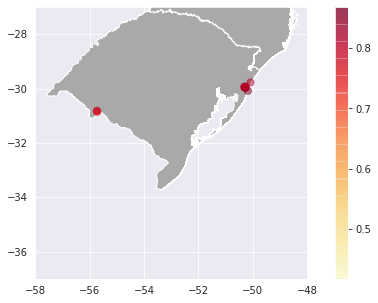

In [97]:
# northeast Brazil
fig,ax = plt.subplots(1,1,figsize=(10,5))
shpBRA.plot(color='darkgrey',ax=ax)
ax.set_ylim(-37,-27)
ax.set_xlim(-58,-48)
im = ax.scatter(x=BRAcor.lon,y=BRAcor.lat,c=BRAcor.value,cmap='YlOrRd',alpha=0.5,label='cor',s=50)
plt.colorbar(im,ax=ax)

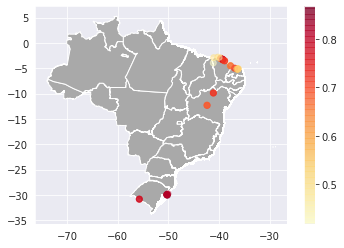

In [87]:
shpBRA.plot(color='darkgrey')
plt.scatter(x=BRAcor.lon,y=BRAcor.lat,c=BRAcor.value,cmap='YlOrRd',alpha=0.5,label='cor')
plt.colorbar()

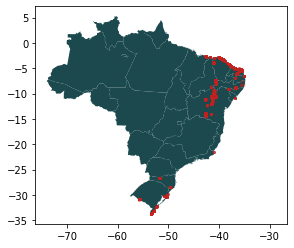

In [6]:
shpBRA.plot(color=COLORS[4])
plt.plot(wpBRA.lon,wpBRA.lat,'o',alpha=0.1,markersize=2)

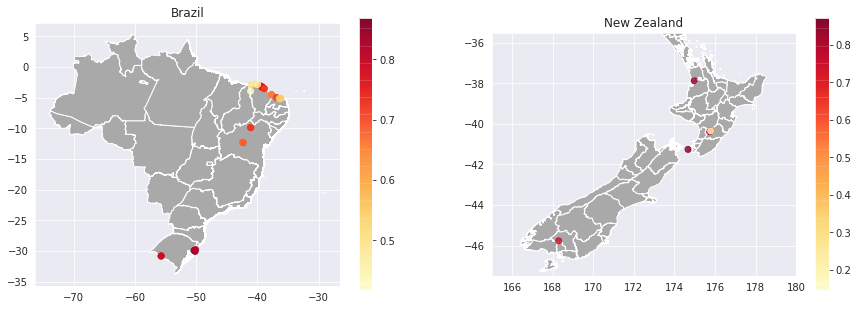

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5),gridspec_kw = {'wspace':0.2, 'hspace':0.1})

shpBRA.plot(color='darkgrey',ax=ax1)
imBRA = ax1.scatter(x=BRAcor.lon,y=BRAcor.lat,c=BRAcor.value,cmap='YlOrRd',alpha=0.8,label='cor')
plt.colorbar(imBRA,ax=ax1)
ax1.set_title('Brazil')

ax2.set_xlim(165,180)
ax2.set_ylim(-47.5,-35.5)
shpNZ.to_crs({'init': 'epsg:4326'}).plot(color='darkgrey',ax=ax2)#.set_xlim(165,180)
imNZ = ax2.scatter(x=NZcor.lon,y=NZcor.lat,c=NZcor.value,cmap='YlOrRd',alpha=0.8,label='cor')
plt.colorbar(imNZ,ax=ax2)
ax2.set_title('New Zealand')

plt.savefig(results_path + '/map_corr_BRA_NZ.png')

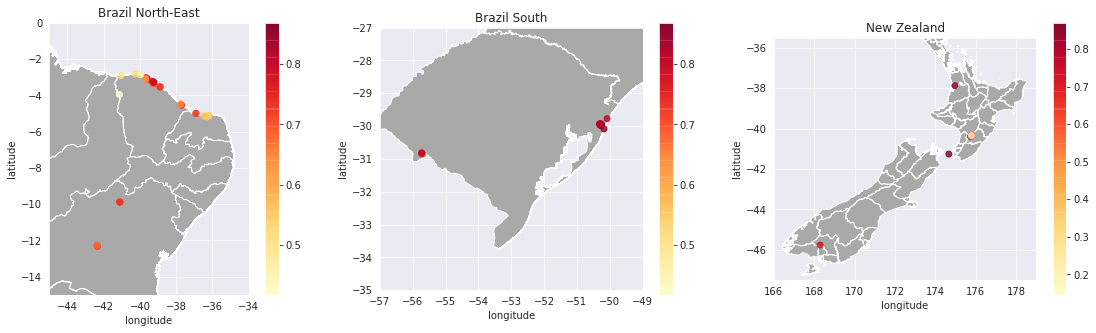

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5),gridspec_kw = {'wspace':0.2, 'hspace':0.1})

ax1.set_xlim(-45,-34)
ax1.set_ylim(-15,0)
shpBRA.plot(color='darkgrey',ax=ax1)
imBRA = ax1.scatter(x=BRAcor.lon,y=BRAcor.lat,c=BRAcor.value,cmap='YlOrRd',alpha=0.8,label='cor')
plt.colorbar(imBRA,ax=ax1)
ax1.set_title('Brazil North-East')
ax1.set_xlabel('longitude')
ax1.set_ylabel('latitude')

ax2.set_xlim(-57,-49)
ax2.set_ylim(-35,-27)
shpBRA.plot(color='darkgrey',ax=ax2)
imBRA = ax2.scatter(x=BRAcor.lon,y=BRAcor.lat,c=BRAcor.value,cmap='YlOrRd',alpha=0.8,label='cor')
plt.colorbar(imBRA,ax=ax2)
ax2.set_title('Brazil South')
ax2.set_xlabel('longitude')
ax2.set_ylabel('latitude')

ax3.set_xlim(166,179)
ax3.set_ylim(-47.5,-35.5)
shpNZ.to_crs({'init': 'epsg:4326'}).plot(color='darkgrey',ax=ax3)#.set_xlim(165,180)
imNZ = ax3.scatter(x=NZcor.lon,y=NZcor.lat,c=NZcor.value,cmap='YlOrRd',alpha=0.8,label='cor')
plt.colorbar(imNZ,ax=ax3)
ax3.set_title('New Zealand')
ax3.set_xlabel('longitude')
ax3.set_ylabel('latitude')

plt.savefig(results_path + '/map_corr_BRA_NZ_old.png')

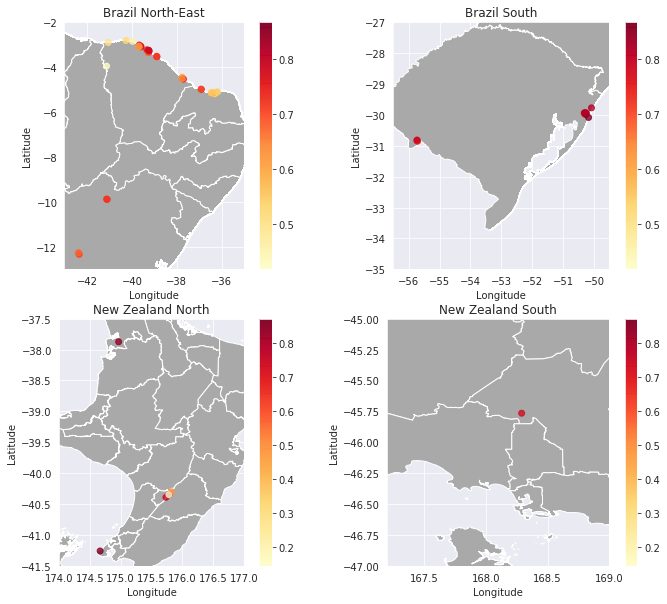

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(12,10),gridspec_kw = {'wspace':0.2, 'hspace':0.2})

ax1.set_xlim(-43,-35)
ax1.set_ylim(-13,-2)
shpBRA.plot(color='darkgrey',ax=ax1)
imBRA = ax1.scatter(x=BRAcor.lon,y=BRAcor.lat,c=BRAcor.value,cmap='YlOrRd',alpha=0.8,label='cor')
plt.colorbar(imBRA,ax=ax1)
ax1.set_title('Brazil North-East')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

ax2.set_xlim(-56.5,-49.5)
ax2.set_ylim(-35,-27)
shpBRA.plot(color='darkgrey',ax=ax2)
imBRA = ax2.scatter(x=BRAcor.lon,y=BRAcor.lat,c=BRAcor.value,cmap='YlOrRd',alpha=0.8,label='cor')
plt.colorbar(imBRA,ax=ax2)
ax2.set_title('Brazil South')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

ax3.set_xlim(174,177)
ax3.set_ylim(-41.5,-37.5)
shpNZ.to_crs({'init': 'epsg:4326'}).plot(color='darkgrey',ax=ax3)
imNZ = ax3.scatter(x=NZcor.lon,y=NZcor.lat,c=NZcor.value,cmap='YlOrRd',alpha=0.8,label='cor')
plt.colorbar(imNZ,ax=ax3)
ax3.set_title('New Zealand North')
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')

ax4.set_xlim(167.2,169)
ax4.set_ylim(-47,-45)
#ax4.set_xlim(168.15,168.45)
#ax4.set_ylim(-46,-45.6)
shpNZ.to_crs({'init': 'epsg:4326'}).plot(color='darkgrey',ax=ax4)
imNZ = ax4.scatter(x=NZcor.lon,y=NZcor.lat,c=NZcor.value,cmap='YlOrRd',alpha=0.8,label='cor')
plt.colorbar(imNZ,ax=ax4)
ax4.set_title('New Zealand South')
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')



plt.savefig(results_path + '/map_corr_BRA_NZ.png')